In [1]:
import pandas as pd

data = pd.read_csv("../data/student-mat.csv", sep=";")

data.head()


,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"
0,"GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot..."
1,"GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe..."
2,"GP,F,15,U,LE3,T,1,1,at_home,other,other,mother..."
3,"GP,F,15,U,GT3,T,4,2,health,services,home,mothe..."
4,"GP,F,16,U,GT3,T,3,3,other,other,home,father,1,..."


In [2]:
data = pd.read_csv("../data/student-mat.csv", sep=";")

data.head()


,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"
0,"GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot..."
1,"GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe..."
2,"GP,F,15,U,LE3,T,1,1,at_home,other,other,mother..."
3,"GP,F,15,U,GT3,T,4,2,health,services,home,mothe..."
4,"GP,F,16,U,GT3,T,3,3,other,other,home,father,1,..."


In [3]:
data = pd.read_csv("../data/student-mat.csv", sep=",")
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape


(395, 33)

In [5]:
data.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
data["G3"].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'GP'

<Figure size 1200x800 with 0 Axes>

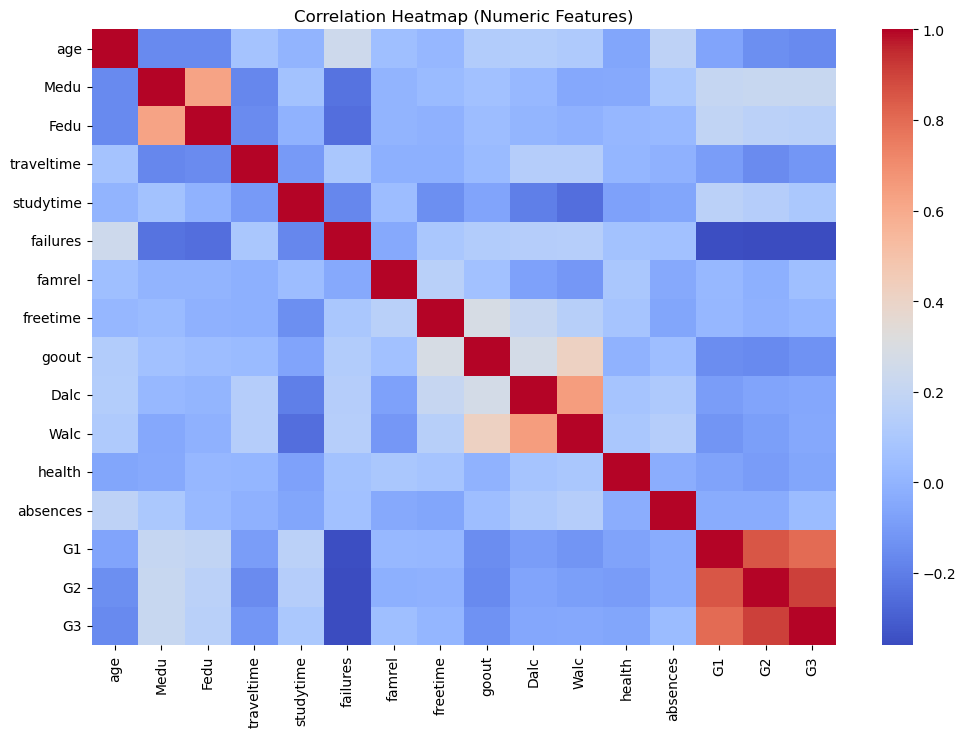

In [8]:
numeric_data = data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


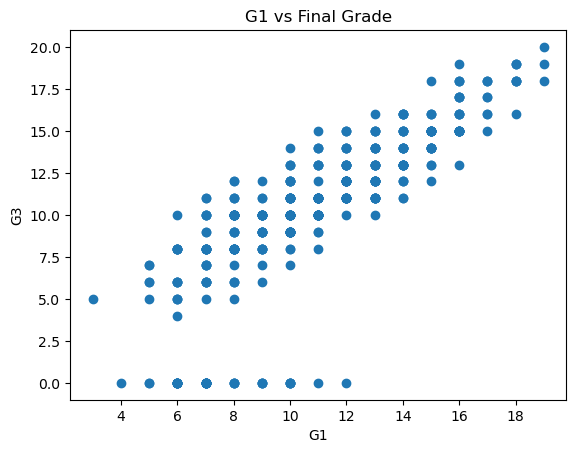

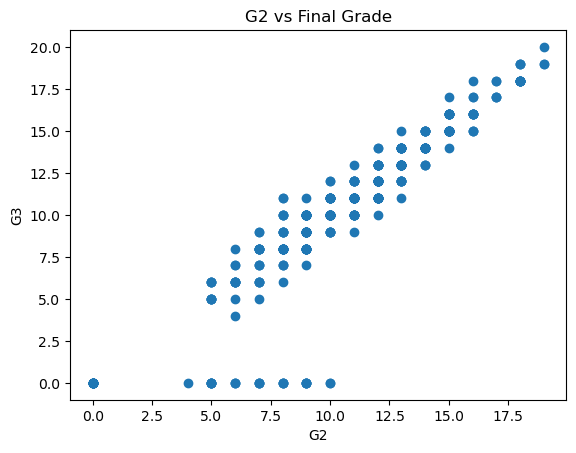

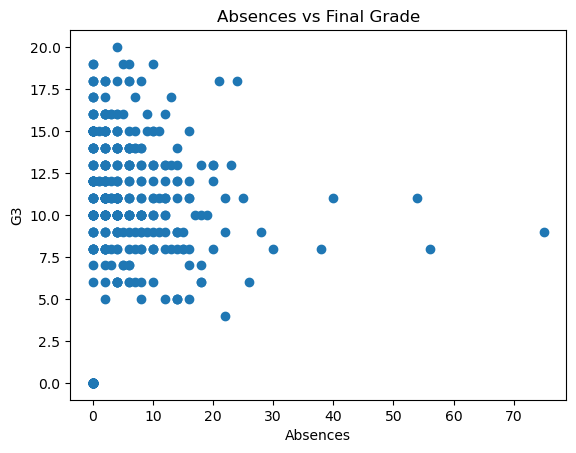

In [9]:
plt.scatter(data["G1"], data["G3"])
plt.xlabel("G1")
plt.ylabel("G3")
plt.title("G1 vs Final Grade")
plt.show()

plt.scatter(data["G2"], data["G3"])
plt.xlabel("G2")
plt.ylabel("G3")
plt.title("G2 vs Final Grade")
plt.show()

plt.scatter(data["absences"], data["G3"])
plt.xlabel("Absences")
plt.ylabel("G3")
plt.title("Absences vs Final Grade")
plt.show()


In [2]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data.drop("G3", axis=1)
y = data["G3"]

# Convert categorical columns to numeric (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


NameError: name 'data' is not defined

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.724134123697402


TypeError: got an unexpected keyword argument 'squared'

In [12]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 2.378369784796137


In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, dt_pred))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))


NameError: name 'X_train' is not defined

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/student-mat.csv")

X = data.drop("G3", axis=1)
y = data["G3"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, dt_pred))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))


Decision Tree R2: 0.795048916950583
Decision Tree RMSE: 2.0500077184170844


In [5]:
import pandas as pd

# Get feature importance
importance = dt.feature_importances_

# Match with column names
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
14,G2,0.738286
12,absences,0.154578
28,reason_home,0.034701
0,age,0.018462
6,famrel,0.010984
36,activities_yes,0.007633
4,studytime,0.005955
25,Fjob_other,0.004024
13,G1,0.003410
10,Walc,0.003284


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    min_samples_leaf=2
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


Random Forest R2: 0.8014734118561535
Random Forest RMSE: 2.017621637933497


In [7]:
import pandas as pd

rf_importance = rf.feature_importances_

feature_importance_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importance
})

feature_importance_rf = feature_importance_rf.sort_values(
    by="Importance", ascending=False
)

feature_importance_rf.head(10)


,Feature,Importance
14,G2,0.796279
12,absences,0.117178
28,reason_home,0.019410
0,age,0.009563
13,G1,0.005156
11,health,0.004421
6,famrel,0.004375
31,guardian_mother,0.004271
33,schoolsup_yes,0.004209
40,romantic_yes,0.004052


In [8]:
import joblib

joblib.dump(rf, "../models/random_forest_student_performance.pkl")


FileNotFoundError: [Errno 2] No such file or directory: '../models/random_forest_student_performance.pkl'

In [9]:
import os

os.makedirs("../models", exist_ok=True)


In [10]:
import joblib

joblib.dump(rf, "../models/random_forest_student_performance.pkl")
joblib.dump(X.columns.tolist(), "../models/model_features.pkl")

print("Model and features saved.")


Model and features saved.


In [11]:
rf_loaded = joblib.load("../models/random_forest_student_performance.pkl")
model_features = joblib.load("../models/model_features.pkl")

print("Loaded", len(model_features), "features")


Loaded 41 features


In [12]:
import pandas as pd
import numpy as np

def predict_student(student_input):
    df = pd.DataFrame([student_input])
    df = df.reindex(columns=model_features, fill_value=0)
    pred = rf_loaded.predict(df)[0]
    return round(pred, 2)


In [13]:
student_1 = {
    "age": 17,
    "absences": 6,
    "studytime": 2,
    "G1": 10,
    "G2": 12,
    "health": 4,
    "famrel": 4
}

print("Predicted Final Grade:", predict_student(student_1))


Predicted Final Grade: 11.95
